In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
a = open('data/movies.txt',encoding = "ISO-8859-1")
a = a.readlines()

# Importing Data

In [3]:
movies = np.zeros((1682, 20)) # contains all data about movies except title
mov_ind_to_tit = ['NO MOVIE HERE AT ID + 0'] # Contains at each index in the array the title of the movie which corresponds 
                                              # to the movie ID number in movies.txt, or the first column of movies
ratings = np.loadtxt('data/data.txt') # contains movie rating data in the form: User ID, Movie ID, Rating
col = 0
for line in open('data/movies.txt', encoding = "ISO-8859-1").readlines():
    splt = line.split('\t')
    mov_ind_to_tit.append(splt[1])
    for i in range(len(splt)):
        if(i == 0):
            movies[col][i] = int(splt[i])
        elif(i > 1):
            movies[col][i - 1] = int(splt[i])
            
        
    col += 1

In [4]:
train = np.loadtxt("data/train.txt")
test = np.loadtxt("data/test.txt")

# 4) Basic Visualizations

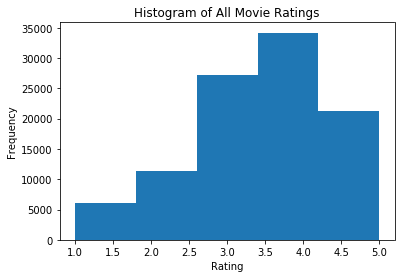

In [5]:
# This is part 1 of the basic visualizations: Histogram of all movie ratings

all_ratings = np.array([ratings[i][2] for i in range(len(ratings))])
plt.hist(all_ratings, bins = 5)
plt.title("Histogram of All Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

['Star Wars (1977)' 'Contact (1997)' 'Fargo (1996)'
 'Return of the Jedi (1983)' 'Liar Liar (1997)'
 '"English Patient, The (1996)"' 'Scream (1996)' 'Toy Story (1995)'
 'Air Force One (1997)' 'Independence Day (ID4) (1996)']


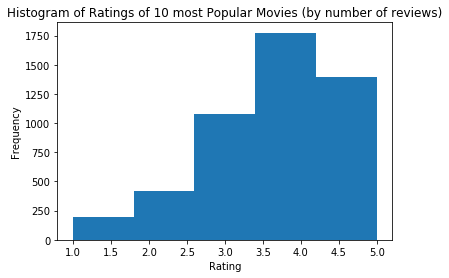

In [6]:
# This is part 2 of the basic visualizations: Histogram ofthe most popular movies

all_movs = [ratings[i][1] for i in range(len(ratings))] # list of all movie ids from all ratings in ratings 
counts = np.bincount(all_movs) # counts the frequency of each movie, stores frequency of i in counts[i]
top_ten = counts.argsort()[-10:][::-1] # index of top 10 most popular movies in all_movs
mov_ind_nump = np.array(mov_ind_to_tit)
print(mov_ind_nump[top_ten])  # This shows what the top 10 movies actually are.

top_ten_rates = []
for i in range(len(ratings)):
    if ratings[i][1] in top_ten:
        top_ten_rates.append(ratings[i][2])

plt.hist(top_ten_rates, bins = 5)
plt.title("Histogram of Ratings of 10 most Popular Movies (by number of reviews)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

[[1189.0, 5.0], [1500.0, 5.0], [814.0, 5.0], [1536.0, 5.0], [1293.0, 5.0], [1599.0, 5.0], [1653.0, 5.0], [1467.0, 5.0], [1122.0, 5.0], [1201.0, 5.0]]


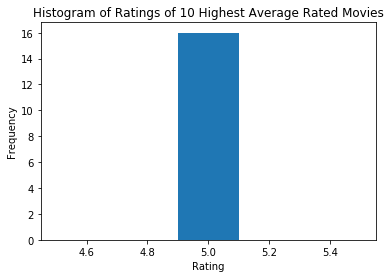

In [7]:
# This is part 3 of the basic visualizations: Histogram of highest rated movies
# note that all of these movies only have 1 review, so their average rating is 5.0

avg_ratings = {} # Dict with form Key = movie ID, val = [total of all ratings, number of ratings, avg rating]
for i in range(len(ratings)):
    if (ratings[i][1] not in avg_ratings.keys()):
        avg_ratings[ratings[i][1]] = [ratings[i][2], 1, ratings[i][2]]
    else: 
        temp = avg_ratings[ratings[i][1]][:]
        temp[0] = temp[0] + ratings[i][2]
        temp[1] = temp[1] + 1
        temp[2] = temp[0] / temp[1]
        avg_ratings[ratings[i][1]] = temp
# the following code finds the top 10 averages
t_ten_avgs = []
t_ten_avgs_index = []
for i in range(10):
    top = 0
    index = 123456789
    for key in avg_ratings.keys():
        if(avg_ratings[key][2] > top and avg_ratings[key][2]):
            top = avg_ratings[key][2]
            index = key
    del avg_ratings[index]
    t_ten_avgs.append([index, top])
    t_ten_avgs_index.append(index)
tten_avg_hist = []

for i in range(len(ratings)):
    if ratings[i][1] in t_ten_avgs_index:
        tten_avg_hist.append(ratings[i][2])
print(t_ten_avgs)
plt.hist(tten_avg_hist, bins = 5)
plt.title("Histogram of Ratings of 10 Highest Average Rated Movies")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

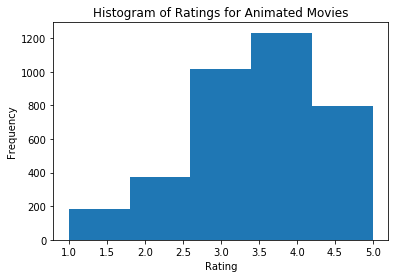

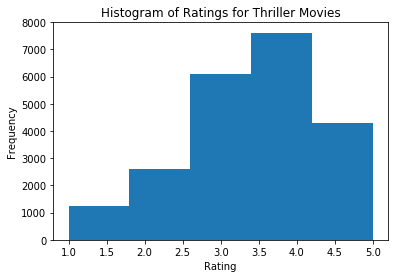

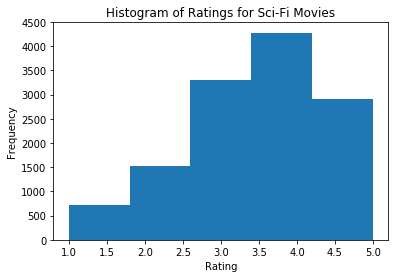

In [8]:
def get_movies_genre(genre):
    '''
    Given an integer genre as described by the following table, selects all movies
    from the array 'movies' which are of that genre (movies can have multiple genres)
    returns a list of indecies of said movies
    
    {1: Unknown, 2: Action, 3: Adventure, 4: Animation, 5: Children’s, 6: Comedy, 
     7: Crime, 8: Documentary, 9: Drama, 10: Fantasy, 11: Film-Noir, 12: Horror,
     13: Musical, 14: Mystery, 15: Romance, 16: Sci-Fi, 17: Thriller, 18: War, 19:Western}
    '''
    lst = []
    for movie in movies:
        if(movie[genre] == 1):
            lst.append(movie[0])
    return lst

animated = get_movies_genre(4)
thriller = get_movies_genre(17)
sci_fi   = get_movies_genre(16)

animated_hist = []
thriller_hist = []
sci_fi_hist   = []

for i in range(len(ratings)):
    if(ratings[i][1] in animated):
        animated_hist.append(ratings[i][2])
    if(ratings[i][1] in thriller):
        thriller_hist.append(ratings[i][2])
    if(ratings[i][1] in sci_fi):
        sci_fi_hist.append(ratings[i][2])
        
        
plt.hist(animated_hist, bins = 5)
plt.title("Histogram of Ratings for Animated Movies")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


plt.hist(thriller_hist, bins = 5)
plt.title("Histogram of Ratings for Thriller Movies")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


plt.hist(sci_fi_hist, bins = 5)
plt.title("Histogram of Ratings for Sci-Fi Movies")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Implementation of Last Weeks Problem 2 Algorithm

In [68]:
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return (1-reg*eta)*Ui + eta * Vj * (Yij - np.dot(Ui,Vj))     

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return (1-reg*eta)*Vj + eta * Ui * (Yij - np.dot(Ui,Vj))

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    # Compute mean squared error on each data point in Y; include
    # regularization penalty in error calculations.
    # We first compute the total squared squared error
    err = 0.0
    for (i,j,Yij) in Y:
        err += 0.5 *(Yij - np.dot(U[i-1], V[:,j-1]))**2
    # Add error penalty due to regularization if regularization
    # parameter is nonzero
    if reg != 0:
        U_frobenius_norm = np.linalg.norm(U, ord='fro')
        V_frobenius_norm = np.linalg.norm(V, ord='fro')
        err += 0.5 * reg * (U_frobenius_norm ** 2)
        err += 0.5 * reg * (V_frobenius_norm ** 2)
    # Return the mean of the regularized error
    return err / float(len(Y))

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    # Initialize U, V  
    U = np.random.random((M,K)) - 0.5
    V = np.random.random((K,N)) - 0.5
    size = Y.shape[0]
    delta = None
    indices = np.arange(size)    
    for epoch in range(max_epochs):
        # Run an epoch of SGD
        before_E_in = get_err(U, V, Y, reg)
        np.random.shuffle(indices)
        for ind in indices:
            (i,j, Yij) = Y[ind]
            # Update U[i], V[j]
            U[i-1] = grad_U(U[i-1], Yij, V[:,j-1], reg, eta)
            V[:,j-1] = grad_V(V[:,j-1], Yij, U[i-1], reg, eta);
        # At end of epoch, print E_in
        E_in = get_err(U, V, Y, reg)
        print("Epoch %s, E_in (regularized MSE): %s"%(epoch + 1, E_in))

        # Compute change in E_in for first epoch
        if epoch == 0:
            delta = before_E_in - E_in

        # If E_in doesn't decrease by some fraction <eps>
        # of the initial decrease in E_in, stop early            
        elif before_E_in - E_in < eps * delta:
            break
    return (U, V, get_err(U, V, Y))


In [75]:
Y_train = train.astype(int)
Y_test = test.astype(int)

M = max(Y_train[:,0]).astype(int) # users
N = max(Y_train[:,1]).astype(int) # movies
print("User: " + str(M))
print("Movies: " + str(N))
print("Factorizing with ", M, " users, ", N, " movies.")
Ks = [10,20,30,50,100]

reg = 0.1
eta = 0.03 # learning rate
K = 20


U,V, err = train_model(M, N, K, eta, reg, Y_train)

print("Eout: " + str(get_err(U, V, Y_test, 0)))

User: 943
Movies: 1682
Factorizing with  943  users,  1682  movies.
Epoch 1, E_in (regularized MSE): 0.5053558517037551
Epoch 2, E_in (regularized MSE): 0.4320994007511033
Epoch 3, E_in (regularized MSE): 0.4035634278456004
Epoch 4, E_in (regularized MSE): 0.3897167297173015
Epoch 5, E_in (regularized MSE): 0.37681763210061786
Epoch 6, E_in (regularized MSE): 0.3641795989232005
Epoch 7, E_in (regularized MSE): 0.3549410174303494
Epoch 8, E_in (regularized MSE): 0.34970474834354937
Epoch 9, E_in (regularized MSE): 0.34442259601412045
Epoch 10, E_in (regularized MSE): 0.33608814201496806
Epoch 11, E_in (regularized MSE): 0.3306952428380964
Epoch 12, E_in (regularized MSE): 0.3250810597838444
Epoch 13, E_in (regularized MSE): 0.32004287973305445
Epoch 14, E_in (regularized MSE): 0.3177942617877772
Epoch 15, E_in (regularized MSE): 0.3137667602889782
Epoch 16, E_in (regularized MSE): 0.3110742036351031
Epoch 17, E_in (regularized MSE): 0.30913011210233393
Epoch 18, E_in (regularized MSE): 

# With Bias

In [72]:
def grad_U_Bias(avg, Ai, Bj, Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return (1-reg*eta)*Ui + eta * Vj * ((Yij - avg) - (np.dot(Ui,Vj) + Ai + Bj))     

def grad_V_Bias(avg, Ai, Bj, Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return (1-reg*eta)*Vj + eta * Ui * ((Yij - avg) - (np.dot(Ui,Vj) + Ai + Bj))

def grad_A(avg, Ai, Bj, Ui, Yij, Vj, reg, eta):
    
    """
    Returns the gradient of user bias vector A
    
    """
    return Ai - eta * (reg * Ai + ((Yij - avg) - (np.dot(Ui,Vj) + Ai + Bj)))

def grad_B(avg, Ai, Bj, Ui, Yij, Vj, reg, eta):
    
    """
    Returns the gradient of movie bias vector B
    """
    
    return Bj - eta * (reg * Bj + ((Yij - avg) - (np.dot(Ui,Vj) + Ai + Bj)))

def get_err_Bias(avg, A, B, U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    # Compute mean squared error on each data point in Y; include
    # regularization penalty in error calculations.
    # We first compute the total squared squared error
    err = 0.0
    for (i,j,Yij) in Y:
        err += 0.5 *(Yij - avg - np.dot(U[i-1], V[:,j-1]) - A[i-1] - B[j-1])**2
    # Add error penalty due to regularization if regularization
    # parameter is nonzero
    if reg != 0:
        U_frobenius_norm = np.linalg.norm(U, ord='fro')
        V_frobenius_norm = np.linalg.norm(V, ord='fro')
        A_frobenius_norm = np.linalg.norm(A)
        B_frobenius_norm = np.linalg.norm(B)
        err += 0.5 * reg * (U_frobenius_norm ** 2)
        err += 0.5 * reg * (V_frobenius_norm ** 2)
        err += 0.5 * reg * (A_frobenius_norm ** 2)
        err += 0.5 * reg * (B_frobenius_norm ** 2)
    # Return the mean of the regularized error
    return err / float(len(Y))

def train_model_Bias(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    # Initialize U, V  
    U = np.random.random((M,K)) - 0.5
    V = np.random.random((K,N)) - 0.5
    A = np.random.random(M) - 0.5
    B = np.random.random(N) - 0.5
    mu = Y[:,2].mean()
    size = Y.shape[0]
    delta = None
    indices = np.arange(size)    
    for epoch in range(max_epochs):
        # Run an epoch of SGD
        before_E_in = get_err_Bias(mu, A, B, U, V, Y, reg)
        np.random.shuffle(indices)
        for ind in indices:
            (i,j, Yij) = Y[ind]
            # Update U[i], V[j], A[i], B[j]
            U[i-1] = grad_U_Bias(mu, A[i-1], B[j-1], U[i-1], Yij, V[:,j-1], reg, eta)
            V[:,j-1] = grad_V_Bias(mu, A[i-1], B[j-1], V[:,j-1], Yij, U[i-1], reg, eta)
            A[i-1] = grad_A(mu, A[i-1], B[j-1], U[i-1], Yij, V[:,j-1], reg, eta)
            B[j-1] = grad_B(mu, A[i-1], B[j-1], U[i-1], Yij, V[:,j-1], reg, eta)
        # At end of epoch, print E_in
        E_in = get_err_Bias(mu, A, B, U, V, Y, reg)
        print("Epoch %s, E_in (regularized MSE): %s"%(epoch + 1, E_in))

        # Compute change in E_in for first epoch
        if epoch == 0:
            delta = before_E_in - E_in

        # If E_in doesn't decrease by some fraction <eps>
        # of the initial decrease in E_in, stop early            
        elif before_E_in - E_in < eps * delta:
            break
    return (U, V, A, B, get_err_Bias(mu, A, B, U, V, Y, reg))


In [76]:
print("User: " + str(M))
print("Movies: " + str(N))
print("Factorizing with ", M, " users, ", N, " movies.")
Ks = [10,20,30,50,100]
mu = Y_train[:,2].mean()

reg = 0.1
eta = 0.03 # learning rate
K = 20


U_bias,V_bias, A, B, err_bias = train_model_Bias(M, N, K, eta, reg, Y_train)

print("Eout: " + str(get_err_Bias(mu, A, B, U_bias, V_bias, Y_test, 0)))

User: 943
Movies: 1682
Factorizing with  943  users,  1682  movies.
Epoch 1, E_in (regularized MSE): 0.6288634944725264
Epoch 2, E_in (regularized MSE): 0.41554279670780353
Epoch 3, E_in (regularized MSE): 0.387144833450517
Epoch 4, E_in (regularized MSE): 0.37454926195723914
Epoch 5, E_in (regularized MSE): 0.3642406242048381
Epoch 6, E_in (regularized MSE): 0.353532661783584
Epoch 7, E_in (regularized MSE): 0.34704183465357547
Epoch 8, E_in (regularized MSE): 0.3385391340279345
Epoch 9, E_in (regularized MSE): 0.33123228027269497
Epoch 10, E_in (regularized MSE): 0.32507443210242987
Epoch 11, E_in (regularized MSE): 0.3198260578547598
Epoch 12, E_in (regularized MSE): 0.3140329256217297
Epoch 13, E_in (regularized MSE): 0.3099248680807091
Epoch 14, E_in (regularized MSE): 0.3052426168694882
Epoch 15, E_in (regularized MSE): 0.30331381516901407
Epoch 16, E_in (regularized MSE): 0.29944489053804535
Epoch 17, E_in (regularized MSE): 0.2973548313231801
Epoch 18, E_in (regularized MSE): 0

# Off-The-Shelf Implementation

In [117]:
from sklearn.decomposition import NMF

In [152]:
# since the user_id, movie_id, and ratings are all non-negative, we can use this package
model = NMF(n_components=3, init='random', random_state=0, max_iter=300, alpha=0.1,shuffle=True)
W = model.fit_transform(Y_train)
H = model.components_

In [153]:
estimate_in = np.matmul(W,H)
print("MSE for input data: " + str(((Y_train - estimate_in)**2).mean(axis=None)))
print("MSE for output data: " + str(((Y_test - estimate_in)**2).mean(axis=None)))

MSE for input data: 1.1404065798156444


ValueError: operands could not be broadcast together with shapes (10000,3) (90000,3) 